<a href="https://colab.research.google.com/github/mghendi/ABW-Academy/blob/main/Practitioners%20Course/Cohort1_2022/Projects/Samuel%20Mwamburi%20Mghendi/abw_data_wrangling_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyshp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.2 MB/s 


In [2]:
# Import Python libraries
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!git clone https://github.com/mghendi/ABW-Academy 

Cloning into 'ABW-Academy'...
remote: Enumerating objects: 964, done.
remote: Counting objects: 100% (383/383), done.
remote: Compressing objects: 100% (230/230), done.
remote: Total 964 (delta 241), reused 202 (delta 136), pack-reused 581
Receiving objects: 100% (964/964), 37.53 MiB | 34.91 MiB/s, done.
Resolving deltas: 100% (438/438), done.


In [4]:
!ls 'ABW-Academy/Practitioners Course/Cohort1_2022/Projects/Samuel Mwamburi Mghendi/ken_adm_iebc_20191031_shp'

ken_admbnda_adm0_iebc_20191031.CPG
ken_admbnda_adm0_iebc_20191031.dbf
ken_admbnda_adm0_iebc_20191031.prj
ken_admbnda_adm0_iebc_20191031.sbn
ken_admbnda_adm0_iebc_20191031.sbx
ken_admbnda_adm0_iebc_20191031.shp
ken_admbnda_adm0_iebc_20191031.shp.xml
ken_admbnda_adm0_iebc_20191031.shx
ken_admbnda_adm1_iebc_20191031.CPG
ken_admbnda_adm1_iebc_20191031.dbf
ken_admbnda_adm1_iebc_20191031.prj
ken_admbnda_adm1_iebc_20191031.sbn
ken_admbnda_adm1_iebc_20191031.sbx
ken_admbnda_adm1_iebc_20191031.shp
ken_admbnda_adm1_iebc_20191031.shp.xml
ken_admbnda_adm1_iebc_20191031.shx
ken_admbnda_adm2_iebc_20191031.CPG
ken_admbnda_adm2_iebc_20191031.dbf
ken_admbnda_adm2_iebc_20191031.prj
ken_admbnda_adm2_iebc_20191031.sbn
ken_admbnda_adm2_iebc_20191031.sbx
ken_admbnda_adm2_iebc_20191031.shp
ken_admbnda_adm2_iebc_20191031.shp.xml
ken_admbnda_adm2_iebc_20191031.shx
ken_admbndl_admALL_iebc_itos_20191031.CPG
ken_admbndl_admALL_iebc_itos_20191031.dbf
ken_admbndl_admALL_iebc_itos_20191031.prj
ken_admbndl_admALL_ieb

In [5]:
content = 'ABW-Academy/Practitioners Course/Cohort1_2022/Projects/Samuel Mwamburi Mghendi/ken_adm_iebc_20191031_shp'

In [6]:
# Initializing vizualization set

sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))
%matplotlib inline

In [7]:
# Read Kenya boundary data level 2 shapefile
shp_path = content + '/ken_admbnda_adm2_iebc_20191031.shp'
sf = shp.Reader(shp_path)

# Check the number of different shapes the function imported
len(sf.shapes())

290

In [8]:
# Exploring a single shape
sf.shapes() [1]

Shape #1: POLYGON

In [9]:
# Converting shapefile data on Pandas dataframe
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [10]:
# Convert shapefile data on a dataframe
df = read_shapefile(sf)
df.shape

(290, 15)

In [11]:
# Sample of 5 records
df.sample(5)

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,ValidTo,coords
10,2.611854,0.148415,Baringo South,KE030160,,,,Baringo,KE030,Kenya,KE,2017-11-03,2019-10-31,None,"[(36.056475797000076, 0.7323521340000525), (36..."
0,1.746986,0.040829,Ainabkoi,KE027144,,,,Uasin Gishu,KE027,Kenya,KE,2017-11-03,2019-10-31,None,"[(35.35932922400008, 0.5210847780000449), (35...."
276,0.791571,0.016181,Ugunja,KE041233,,,,Siaya,KE041,Kenya,KE,2017-11-03,2019-10-31,None,"[(34.388214720000065, 0.2749658650000697), (34..."
210,1.653763,0.048596,Nithi,KE013060,,,,Tharaka-Nithi,KE013,Kenya,KE,2017-11-03,2019-10-31,None,"[(37.61405731800005, -0.3050829059999387), (37..."
274,6.400987,1.195936,Turkana West,KE023124,,,,Turkana,KE023,Kenya,KE,2017-11-03,2019-10-31,None,"[(34.95471191400003, 4.612976074000073), (34.9..."


In [12]:
# MatPlotLib function for plotting shapes
def plot_shape(id, s=None):
    # Plots a single shape
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

In [13]:
# MatPlotLib function for plotting a complete map
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

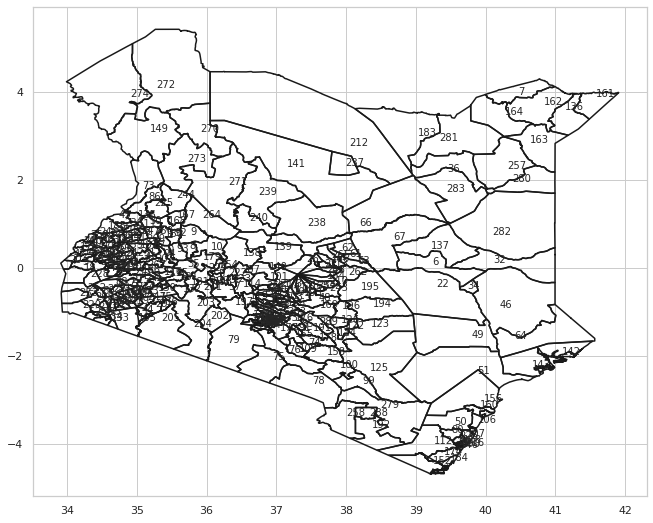

In [14]:
# Plotting the Kenyan map
plot_map(sf)

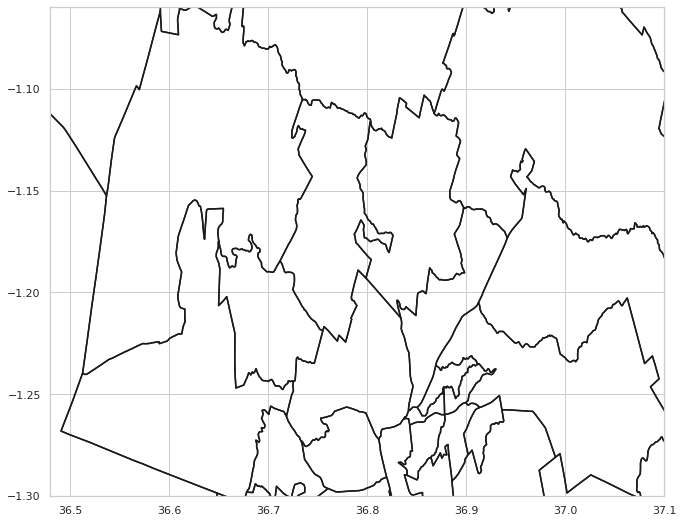

In [17]:
# Zooming in to Nairobi

y_lim = (-1.30,-1.06) # latitude 
x_lim = (36.48, 37.10) # longitude
plot_map(sf, x_lim, y_lim)

In [18]:
# MatPlotLib function for plotting a shape over a complete map

def plot_map2(id, sf, x_lim = None, y_lim = None, figsize=(11,9)):
    '''
    Plot map with lim coordinates
    '''
   
    plt.figure(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat, 'r', linewidth=3) 
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [20]:
# MatPlotLib function for shading an area on the plot

def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [22]:
# Locate Kasarani's (A sub-county in Nairobi) ID

df[df.ADM2_EN == 'Kasarani']

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,ValidTo,coords
89,0.712715,0.011074,Kasarani,KE047280,,,,Nairobi,KE047,Kenya,KE,2017-11-03,2019-10-31,None,"[(37.101759720000075, -1.25907536699998), (37...."


(36.97851043768569, -1.2410459486232595)

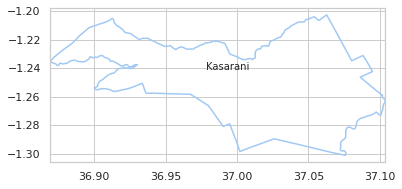

In [35]:
# Plot the polygon based on Kasarani's coordinates

subloc = 'Kasarani'
subl_id = df[df.ADM2_EN == subloc].index.values[0]
plot_shape(subl_id, subloc)

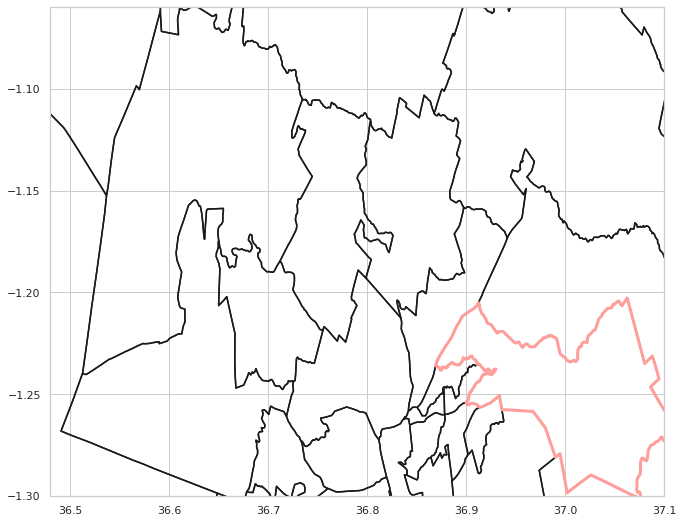

In [38]:
# Highlighting Kasarani on the map of Nairobi

plot_map2(89, sf, x_lim, y_lim)

<Figure size 792x648 with 0 Axes>

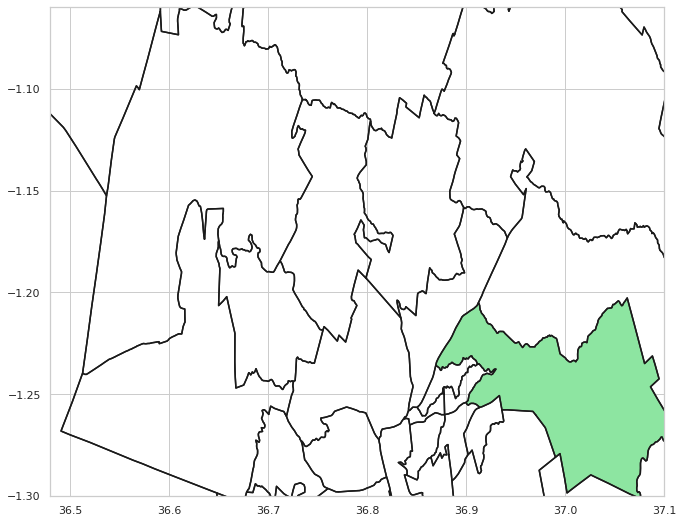

In [39]:
# Shading Kasarani on the map of Nairobi

plot_map_fill(89, sf, x_lim, y_lim, color='g')

In [15]:
# Filtering the data frame to extract Nairobi administrative regions

df.loc[df['ADM1_EN'] == 'Nairobi']

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,ValidTo,coords
33,0.267128,0.001986,Dagoretti,KE047276,,,,Nairobi,KE047,Kenya,KE,2017-11-03,2019-10-31,None,"[(36.71747970600006, -1.2598320249999801), (36..."
37,0.130085,0.000665,Embakasi Central,KE047284,,,,Nairobi,KE047,Kenya,KE,2017-11-03,2019-10-31,None,"[(36.93616714500007, -1.2575947759999622), (36..."
38,0.405266,0.006976,Embakasi East,KE047285,,,,Nairobi,KE047,Kenya,KE,2017-11-03,2019-10-31,None,"[(36.97043228100006, -1.2601730819999375), (36..."
39,0.143452,0.000441,Embakasi North,KE047283,,,,Nairobi,KE047,Kenya,KE,2017-11-03,2019-10-31,None,"[(36.91314792600008, -1.2351873219999447), (36..."
40,0.243431,0.001426,Embakasi South,KE047282,,,,Nairobi,KE047,Kenya,KE,2017-11-03,2019-10-31,None,"[(36.90722340700006, -1.359906978999959), (36...."
41,0.168045,0.000793,Embakasi West,KE047286,,,,Nairobi,KE047,Kenya,KE,2017-11-03,2019-10-31,None,"[(36.902048111000056, -1.255179165999948), (36..."
81,0.139900,0.000718,Kamukunji,KE047288,,,,Nairobi,KE047,Kenya,KE,2017-11-03,2019-10-31,None,"[(36.87826156600005, -1.259923457999946), (36...."
89,0.712715,0.011074,Kasarani,KE047280,,,,Nairobi,KE047,Kenya,KE,2017-11-03,2019-10-31,None,"[(37.101759720000075, -1.25907536699998), (37...."
98,0.204387,0.001002,Kibra,KE047278,,,,Nairobi,KE047,Kenya,KE,2017-11-03,2019-10-31,None,"[(36.82328796400003, -1.2971760029999473), (36..."
108,0.228079,0.002385,Kilimani,KE047275,,,,Nairobi,KE047,Kenya,KE,2017-11-03,2019-10-31,None,"[(36.81180869200006, -1.272080745999972), (36...."


In [40]:
# MatPlotLib function for plotting multiple shapes on a full map

def plot_map_fill_multiples_ids(title, comuna, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

<Figure size 792x648 with 0 Axes>

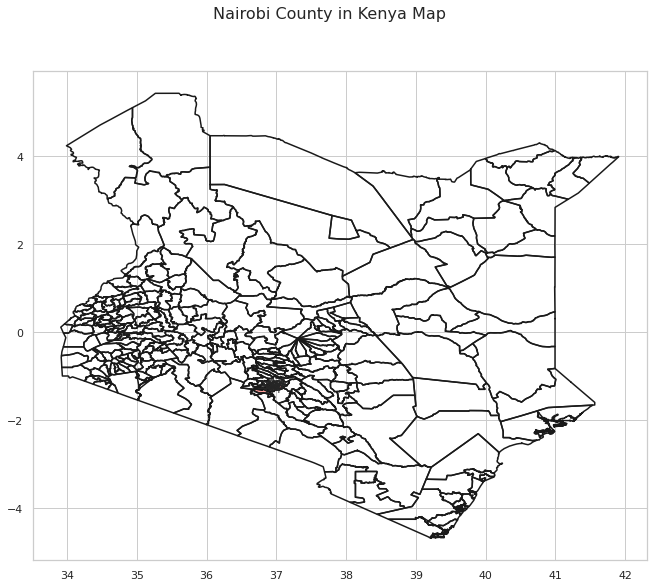

In [42]:
# Using the above function the sub-county input can now take a list of all Nairobi County IDs

subl_id = [33, 37, 38, 39, 40, 41, 81, 89, 98, 108, 144, 157, 171, 231]
plot_map_fill_multiples_ids("Nairobi County in Kenya Map", 
                            subl_id, sf, color = 'r')